In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
# Ejercicio 3

In [4]:
def sol_trinffil(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    '''
    Resuelve el sistema lineal Ax = b donde A es una matriz triangular inferior
    usando sustitución hacia adelante por filas.
    '''
    
    assert not((np.diag(A) == 0).any()), 'Error: A es una matriz singular (det(A) == 0).'
    
    n = A.shape[0]
    x = np.zeros(n)

    for k in range(n):
        if b[k] != 0:
            break

    for i in range(k, n):
        x[i] = (b[i] - A[i, k:i] @ x[k:i]) / A[i, i]
        
    return x


def sol_trinfcol(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    '''
    Resuelve el sistema lineal Ax = b donde A es una matriz triangular inferior
    usando sustitución hacia adelante por columnas.
    '''

    assert not((np.diag(A) == 0).any()), 'Error: A es una matriz singular (det(A) == 0).'

    n = A.shape[0]
    x = np.zeros(n)
    y = b.copy()

    for k in range(n):
        if b[k] != 0:
            break
    
    for j in range(k, n):
        x[j] = y[j] / A[j, j]
        y[j+1:] = y[j+1:] - A[j+1:, j] * x[j]
    
    return x

In [5]:
A1 = np.array([[1, 0, 0, 0], [-1, 1, 0, 0], [0, -1, 1, 0], [0, 0, -2, 2]], dtype=float)
b1 = np.array([0, 0, 1, 1], dtype=float)

print('A1 =')
print(A1)
print('b1 =', b1)

A1 =
[[ 1.  0.  0.  0.]
 [-1.  1.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  0. -2.  2.]]
b1 = [0. 0. 1. 1.]


In [6]:
x1 = sol_trinffil(A1, b1)

print('x1 =', x1)
print('||A1 @ x1 - b1|| =', np.linalg.norm(A1 @ x1 - b1, ord=2))

x1 = [0.  0.  1.  1.5]
||A1 @ x1 - b1|| = 0.0


In [7]:
A2 = np.array([[2, 0, 0, 0], [-1, 2, 0, 0], [3, 1, -1, 0], [4, 1, -3, 3]], dtype=float)
b2 = np.array([2, 3, 2, 9], dtype=float)

print('A2 =')
print(A2)
print('b2 =', b2)

A2 =
[[ 2.  0.  0.  0.]
 [-1.  2.  0.  0.]
 [ 3.  1. -1.  0.]
 [ 4.  1. -3.  3.]]
b2 = [2. 3. 2. 9.]


In [8]:
x2 = sol_trinfcol(A2, b2)

print('x2 =', x2)
print('||A2 @ x2 - b2|| =', np.linalg.norm(A2 @ x2 - b2, ord=2))

x2 = [1. 2. 3. 4.]
||A2 @ x2 - b2|| = 0.0


In [9]:
def sol_trsupfil(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    '''
    Resuelve el sistema lineal Ax = b donde A es una matriz triangular superior
    usando sustitución hacia atrás por filas.
    '''

    assert not((np.diag(A) == 0).any()), 'Error: A es una matriz singular (det(A) == 0).'

    n = A.shape[0]
    x = np.zeros(n)

    for k in range(n-1, -1, -1):
        if b[k] != 0:
            break

    for i in range(k, -1, -1):
        x[i] = (b[i] - A[i, i+1:k+1] @ x[i+1:k+1]) / A[i, i]

    return x


def sol_trsupcol(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    '''
    Resuelve el sistema lineal Ax = b donde A es una matriz triangular superior
    usando sustitución hacia atrás por columnas.
    '''

    assert not((np.diag(A) == 0).any()), 'Error: A es una matriz singular (det(A) == 0).'

    n = A.shape[0]
    x = np.zeros(n)
    y = b.copy()

    for k in range(n-1, -1, -1):
        if b[k] != 0:
            break

    for j in range(k, -1, -1):
        x[j] = y[j] / A[j, j]
        y[:j] = y[:j] - A[:j, j] * x[j]

    return x

In [10]:
A3 = np.array([[9, 2, 4], [0, -6, 3], [0, 0, 5]], dtype=float)
b3 = np.array([18, -2, 7], dtype=float)

print('A3 =')
print(A3)
print('b3 =', b3)

A3 =
[[ 9.  2.  4.]
 [ 0. -6.  3.]
 [ 0.  0.  5.]]
b3 = [18. -2.  7.]


In [11]:
x3 = sol_trsupfil(A3, b3)

print('x3 =', x3)
print('||A3 @ x3 - b3|| =', np.linalg.norm(A3 @ x3 - b3, ord=2))

x3 = [1.14814815 1.03333333 1.4       ]
||A3 @ x3 - b3|| = 4.440892098500626e-16


In [12]:
A4 = np.array([[1, 2, -1, 1], [0, 1, 0, -1], [0, 0, -1, 4], [0, 0, 0, 1]], dtype=float)
b4 = np.array([2, -1, 0, 0], dtype=float)

print('A4 =')
print(A4)
print('b4 =', b4)

A4 =
[[ 1.  2. -1.  1.]
 [ 0.  1.  0. -1.]
 [ 0.  0. -1.  4.]
 [ 0.  0.  0.  1.]]
b4 = [ 2. -1.  0.  0.]


In [13]:
x4 = sol_trsupcol(A4, b4)

print('x4 =', x4)
print('||A4 @ x4 - b4|| =', np.linalg.norm(A4 @ x4 - b4, ord=2))

x4 = [ 4. -1.  0.  0.]
||A4 @ x4 - b4|| = 0.0


In [14]:
# Ejercicio 7

In [15]:
def nivel(c: list):
    '''
    Dada una lista de números positivos, la función genera una matriz aleatoria A de tamaño 2x2 
    simétrica definida positiva y gráfica las curvas de nivel de la función f(x) = x.T @ A @ x
    correspondientes a los números de la lista. 
    '''

    B = np.random.random((2, 2))
    A = B.T @ B

    f = lambda x: x.T @ A @ x

    N = 250
    M = 250

    X1 = np.linspace(-10, 10, N)
    X2 = np.linspace(-10, 10, M)

    fX = np.zeros((M, N))

    for i in range(M):
        for j in range(N):
            x = np.array([X1[j], X2[i]])
            fX[i, j] = f(x)

    fig, ax = plt.subplots()
    CS = ax.contour(X1, X2, fX, c)
    ax.clabel(CS, inline=True, fontsize=10)
    plt.show()

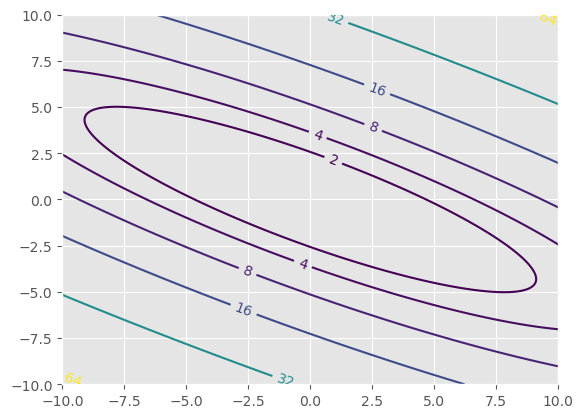

In [16]:
nivel([2, 4, 8, 16, 32, 64])

In [17]:
# Ejercicio 12

In [18]:
def cholesky_outer(A: np.ndarray) -> np.ndarray:
    '''
    Descomposición de Cholesky (Versión Producto Exterior): Dada una matriz A 
    simétrica y definida positiva, se calcula G triangular superior con 
    elementos diagonales positivos tal que A = G.T @ G.
    '''

    assert np.array_equal(A, A.T), 'Error: La matriz A no es simetrica.'

    n = A.shape[0]
    A_copy = A.copy()
    G = np.zeros((n, n))
    
    for i in range(n):

        assert A_copy[i, i] > 0, 'Error: La matriz A no es definida postiva.'

        G[i, i] = np.sqrt(A_copy[i, i])
        G[i, i+1:] = A_copy[i, i+1:] / G[i, i]
        A_copy[i+1:, i+1:] = A_copy[i+1:, i+1:] - np.outer(G[i, i+1:].T, G[i, i+1:])

    return G


def cholesky_inner(A: np.ndarray) -> np.ndarray:
    '''
    Descomposición de Cholesky (Versión Producto Interior): Dada una matriz A 
    simétrica y definida positiva, se calcula G triangular superior con 
    elementos diagonales positivos tal que A = G.T @ G.
    '''

    assert np.array_equal(A, A.T), 'Error: La matriz A no es simetrica.'

    n = A.shape[0]
    G = np.zeros((n, n))

    for i in range(n):

        G[i, i:] = A[i, i:] - G[:i, i].T @ G[:i, i:]
        assert G[i, i] > 0, 'Error: La matriz A no es definida postiva.'
        G[i, i:] = G[i, i:] / np.sqrt(G[i, i])

    return G

In [19]:
# Ejercicio 13

In [20]:
n = 1000

I = np.eye(n)
E = np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1)

A = 2*I - E
A

array([[ 2., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  2.]])

In [21]:
# Cholesky (Versión Producto Exterior)
G = cholesky_outer(A)
print('||G.T @ G - A|| =', np.linalg.norm(G.T @ G - A, ord='fro'))

||G.T @ G - A|| = 5.147892387644517e-15


In [22]:
# Cholesky (Versión Producto Interior)
G = cholesky_inner(A)
print('||G.T @ G - A|| =', np.linalg.norm(G.T @ G - A, ord='fro'))

||G.T @ G - A|| = 1.0539519733670682e-14


In [23]:
# Ejercicio 14

In [24]:
def sol_defpos(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    '''
    Resuelve el sistema lineal Ax = b donde A es una matriz simétrica y definida positiva,
    mediante una descomposición de Cholesky y la resolución de dos sistemas trigulares. 
    '''

    # Calcula el factor de Cholesky de A
    G = cholesky_inner(A)
    # Resuelve el sistema G.T @ y = b
    y = sol_trinffil(G.T, b)
    # Resuelve el sistema G @ x = y
    x = sol_trsupfil(G, y)

    return x 

In [25]:
# Ejercicio 15

In [26]:
n = 500

I = np.eye(n)
E = np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1)
A = 2*I - E

c = n/10 # [n/10, n/2, 9*n/10]
b = np.exp(-(np.arange(n) - c)**2 / 100)

In [27]:
x = sol_defpos(A, b)
print('||A @ x - b|| =', np.linalg.norm(A @ x - b))

||A @ x - b|| = 2.627042167494995e-12


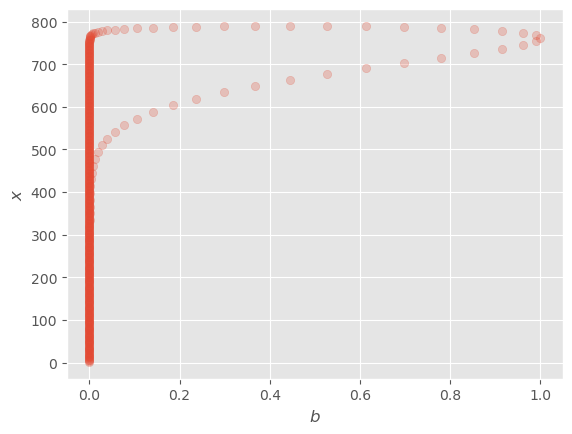

In [28]:
plt.scatter(b, x, alpha=0.25)
plt.xlabel(r'$b$')
plt.ylabel(r'$x$')
plt.grid(True)
plt.show()